# 이미지 처리

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

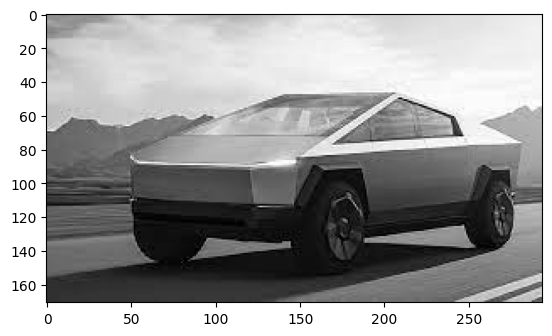

In [2]:
#read image
img_path = '../data/car.png'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
car_image_gray = cv2.imread(img_path, 0)

plt.imshow(car_image_gray,'gray')
plt.show()


## Blur

### Blur

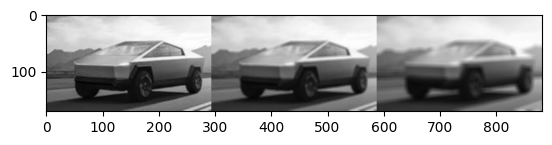

In [3]:
blurred_1 = np.hstack([cv2.blur(car_image_gray,(3,3)),
                       cv2.blur(car_image_gray,(5,5)),
                       cv2.blur(car_image_gray,(9,9))])

plt.imshow(blurred_1, 'gray')
plt.show()

### Guassian fliter

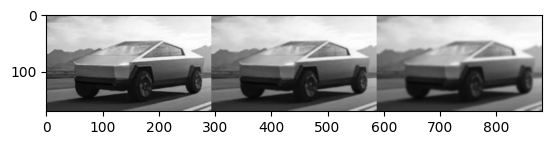

In [4]:
gaussia_blurred_1 = np.hstack([
    cv2.GaussianBlur(car_image_gray,(3,3),0),
    cv2.GaussianBlur(car_image_gray,(5,5),0),
    cv2.GaussianBlur(car_image_gray,(9,9),0),
])

plt.imshow(gaussia_blurred_1, 'gray')
plt.show()

## Sharpening

### Gaussian

In [5]:
def draw(img, str):
    plt.imshow(img)
    plt.title(str)
    plt.show()

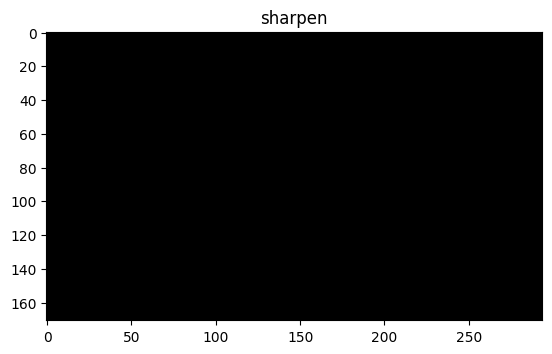

In [6]:
#sharpening filter
filter = np.array([[-1,-1,-1],
                   [-1,-9,-1],
                   [-1,-1,-1]])

sharpen_img = cv2.filter2D(image, -1, filter)

draw(sharpen_img,'sharpen')

### 멕시칸햇(경계선 부드럽게)/ 라플라시안 필터(선명하게)

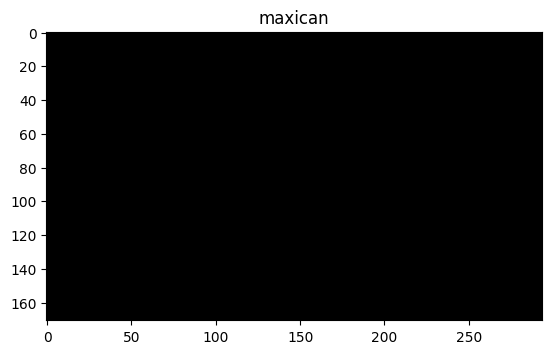

In [8]:
#맥시칸햇
maxican_filter = np.array([[0,0,-1,0,0],
                           [0,-1,-2,-1,0],
                           [-1,-2,16,-2,-1],
                           [0,-1,-2,-1,0],
                           [0,0,-1,0,0]])

maxican_hat_img = cv2.filter2D(image, -1, filter)

plt.imshow(maxican_hat_img)
plt.title('maxican')
plt.show()

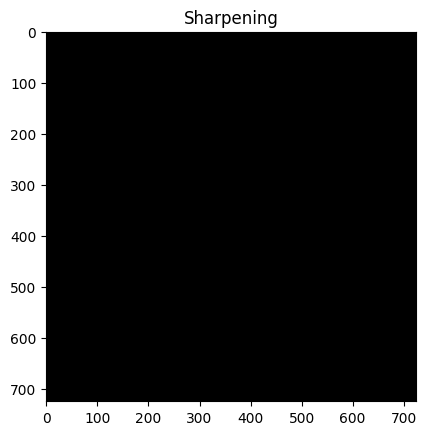

In [11]:
#라플라시안 선명하게

image = cv2.imread('./data/cattt.png',1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


#Sharpening filter
filter = np.array([[-1,-1,-1],
                   [-1,-9,-1],
                   [-1,-1,-1]])

sharpen_img = cv2.filter2D(image,-1, filter)

draw(sharpen_img,'Sharpening')

### 다양한 효과 필터

### 확장, 침식 실험

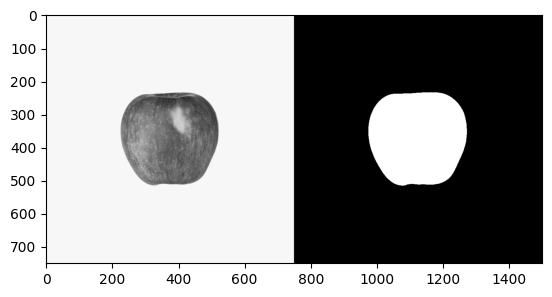

In [3]:
#확장과 침식은 그레이 필터!!
img_path = '../data/apple.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

"""
우리가 사용하는 추가 매개변수 임계강도는 픽셀값, 2320,255로 설정
THRESH_BINARY_INV -> 230보다 작으면 흰색, 230보다 크면 검정색
"""
_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

image_list = np.hstack([
    img,
    mask
])

plt.imshow(image_list,'gray')
plt.show()


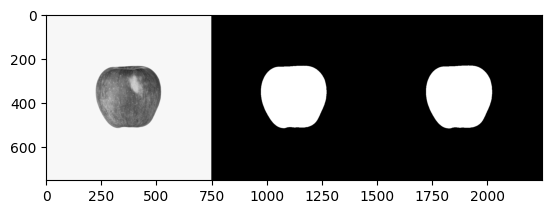

In [4]:
kernel = np.ones((3,3), np.uint8)

dilation = cv2.dilate(mask, kernel)

image_list = np.hstack([
    img,
    mask,
    dilation
])

plt.imshow(image_list, 'gray')
plt.show()

두개를 더 사용해야 잡음이 더 사라진 것을 볼 수 있다

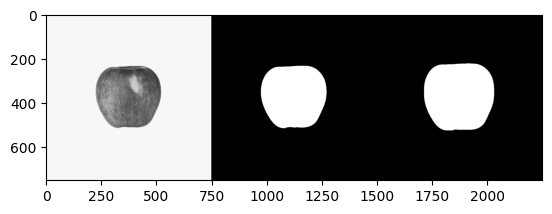

In [5]:
dilation = cv2.dilate(mask, kernel, iterations=10)

image_list = np.hstack([
    img,
    mask,
    dilation
])

plt.imshow(image_list, 'gray')
plt.show()

흰색 영역이 더 확장

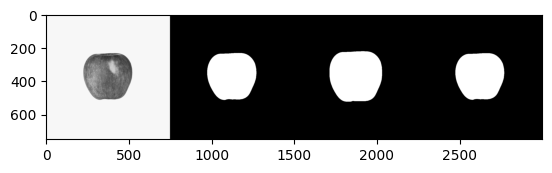

In [7]:
erosion = cv2.erode(mask,kernel)

image_list = np.hstack([img, mask, dilation, erosion])

plt.imshow(image_list,'gray')
plt.show()